<a href="https://colab.research.google.com/github/soumik12345/RCNN/blob/master/notebooks/RCNN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/soumik12345/RCNN
%cd RCNN

Cloning into 'RCNN'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.
/content/RCNN


In [2]:
print('Installing Kaggle...')
!pip install -q kaggle
print('Done!')

print('Please upload kaggle.json: ')
from google.colab import files
files.upload()
print('Done!')

print('Placing kaggle.json in the right place...')
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
print('Done!')

print('Dowloading Pascal VOC 2012...')
!kaggle datasets download -d huanghanchina/pascal-voc-2012
print('Done!')

print('Extracting Dataset...')
!mkdir ./VOCdevkit
!unzip -q pascal-voc-2012.zip -d './VOCdevkit'
!rm pascal-voc-2012.zip
print('Done!')

Installing Kaggle...
Done!
Please upload kaggle.json: 


Saving kaggle.json to kaggle.json
Done!
Placing kaggle.json in the right place...
Done!
Dowloading Pascal VOC 2012...
100% 3.62G/3.63G [02:01<00:00, 47.3MB/s]
100% 3.63G/3.63G [02:01<00:00, 32.1MB/s]
Done!
Extracting Dataset...
Done!


In [3]:
from rcnn.utils.plot_utils import *
from rcnn.utils.dataset_utils import *

In [4]:
image_files, annotation_files = get_file_list()
print('Image files:', len(image_files))
print('Annotation files:', len(annotation_files))

Image files: 17125
Annotation files: 17125


In [5]:
sample_data = parse_xml(annotation_files[0])
sample_data

OrderedDict([('image_id', '2010_000151'),
             ('class_1', 'bird'),
             ('xmax_1', 236.0),
             ('xmin_1', 96.0),
             ('ymax_1', 376.0),
             ('ymin_1', 235.0),
             ('depth', 3),
             ('height', 500),
             ('width', 400),
             ('n_objects', 1)])

In [6]:
dataframe = get_dataframe(
    annotation_files,
    './VOCdevkit/VOC2012/detection_annotation.csv'
)
dataframe.head()

,image_id,class_1,xmax_1,xmin_1,ymax_1,ymin_1,depth,height,width,n_objects,class_2,xmax_2,xmin_2,ymax_2,ymin_2,class_3,xmax_3,xmin_3,ymax_3,ymin_3,class_4,xmax_4,xmin_4,ymax_4,ymin_4,class_5,xmax_5,xmin_5,ymax_5,ymin_5,class_6,xmax_6,xmin_6,ymax_6,ymin_6,class_7,xmax_7,xmin_7,ymax_7,ymin_7,...,class_49,xmin_49,ymin_49,xmax_49,ymax_49,class_50,xmin_50,ymin_50,xmax_50,ymax_50,class_51,xmin_51,ymin_51,xmax_51,ymax_51,class_52,xmin_52,ymin_52,xmax_52,ymax_52,class_53,xmin_53,ymin_53,xmax_53,ymax_53,class_54,xmin_54,ymin_54,xmax_54,ymax_54,class_55,xmin_55,ymin_55,xmax_55,ymax_55,class_56,xmin_56,ymin_56,xmax_56,ymax_56
0,2010_000151,bird,236.0,96.0,376.0,235.0,3,500,400,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009_002813,cat,486.0,4.0,315.0,9.0,3,328,500,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010_001433,bird,257.0,221.0,217.0,193.0,3,500,333,4,bird,50.0,15.0,226.0,183.0,bird,69.0,30.0,291.0,248.0,bird,190.0,161.0,244.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010_002044,car,472.0,38.0,328.0,30.0,3,375,500,10,car,500.0,399.0,243.0,78.0,person,93.0,63.0,121.0,10.0,person,222.0,198.0,43.0,13.0,person,215.0,192.0,179.0,95.0,person,291.0,221.0,164.0,80.0,person,439.0,351.0,133.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010_003506,dog,471.0,124.0,386.0,116.0,3,397,500,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
plot_objects_per_image(dataframe)

In [8]:
plot_class_frequency_distribution(dataframe)

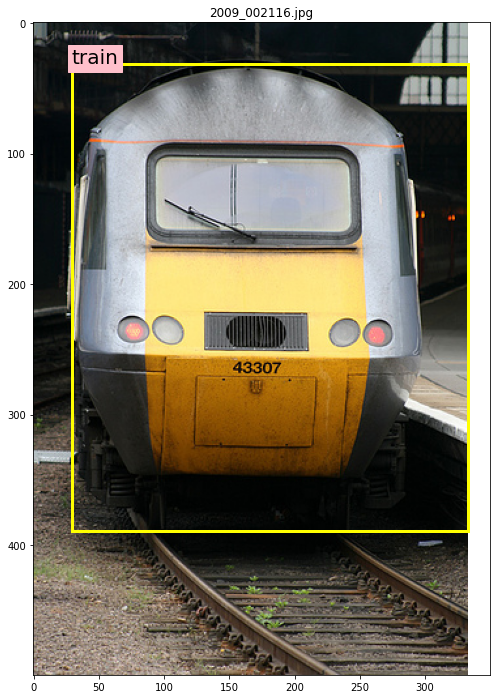

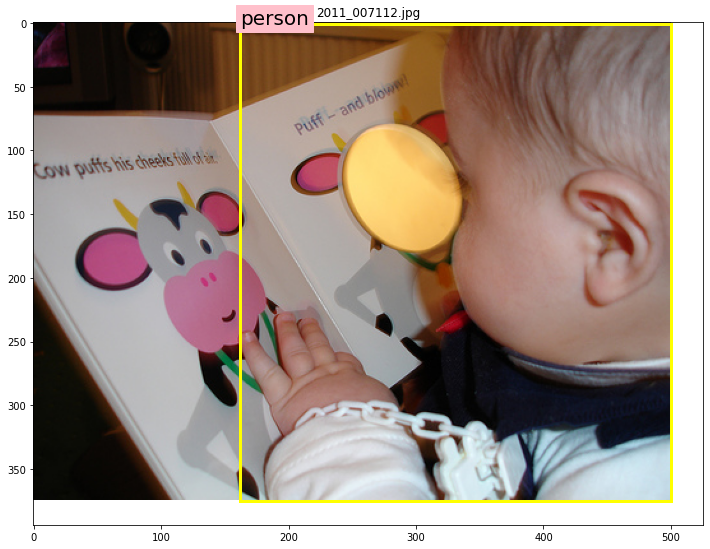

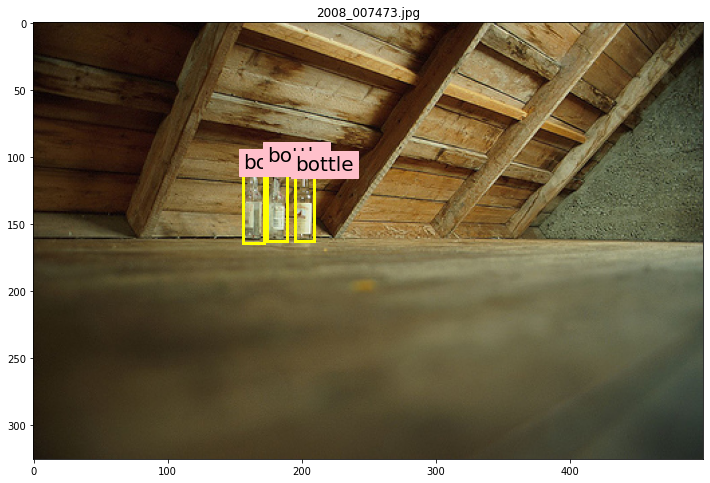

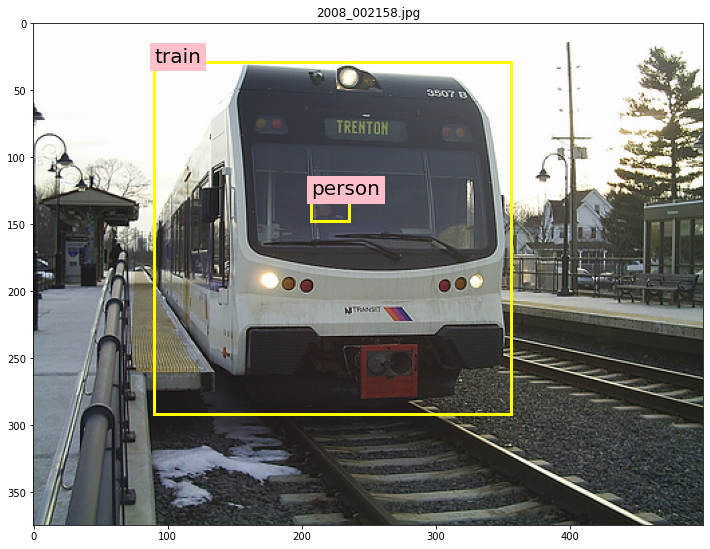

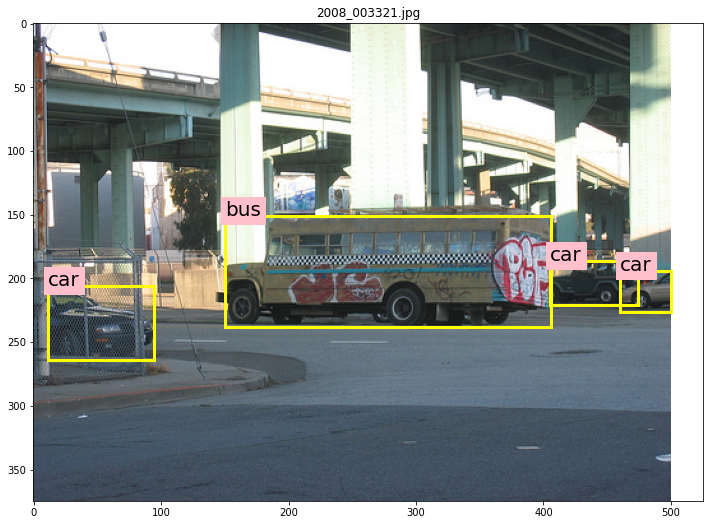

In [9]:
for i in range(5):
    plot_from_dataframe(
        dataframe, np.random.randint(0, len(dataframe)))